# 01 – Data Preprocessing
### Student Depression Prediction: Preparing Data for XGBoost Model

---

## 📌 Objective
Prepare and clean the student depression dataset for machine learning analysis using XGBoost classification.

**Key Tasks:**
- Load and explore raw data
- Handle missing values and outliers
- Encode categorical variables
- Scale numerical features
- Export clean dataset for modeling

---

### 📂 Input  
 - `student_depression_dataset.csv` saved in `Data/raw/`  


### 📦 Output  
- `clean_data.csv` saved in `Data/processed/FC110552_mithula-cbw/`

---

### 📊 Dataset Overview

| **Attribute** | **Details** |
|---------------|-------------|
| **Dataset Size** | 27,901 records × 18 features |
| **Data Type** | Structured tabular data (CSV format) |
| **Target Variable** | `Depression_Status` (Binary: 0/1 or Yes/No) |
| **Problem Type** | Binary Classification |
| **Data Source** | [Student Depression Dataset](www.kaggle.com/datasets/adilshamim8/student-depression-dataset) |

### 📈 Expected Outcomes
- Clean, processed dataset ready for machine learning

In [5]:
# =====================================
# STEP 1: DATA LOADING & EXPLORATION
# =====================================


# 1.1 - Load libraries and suppress warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [ ]:

# 1.2 - Load the dataset

df = pd.read_csv("./Data/raw/student_depression_dataset.csv")

In [41]:
# Reusable function definitions

# Function to Print Shape of DataFrame
def get_data_shape(data: pd.DataFrame) -> None:
    if data.empty:
        print("DataFrame is empty.")
    else:
        # Print the shape of the DataFrame
        print("DataFrame Dimensions")
        print("------------------------")
        print(f"Rows   : {data.shape[0]}")
        print(f"Columns: {data.shape[1]}\n")

# Function to prints the first `n` rows of the given DataFrame.
def print_head(data: pd.DataFrame, n: int = 5) -> None:
   print(f"\nFirst {n} rows:")
   display(data.head(n))

In [ ]:
# 1.3 - Find the dimensions of the dataset
get_data_shape(df)

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 18



In [42]:
# 1.4 - Display first few rows (Provides a quick look at the dataset's content).
print_head(df)


First 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


💡 **Observations:**  
- All column names are readable and appear to be semantically meaningful.
- The `id` column does not increment sequentially
- `Work Pressure` and `Job Satisfaction` have only 0.0 values in the initial rows.
- The `Profession` column appears to contain only "Student" values so far.


In [ ]:
# 1.5 - Prints basic statistics (mean, standard deviation, min, max, etc.)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('id', errors='ignore')  # For  numeric data types
display(df[numeric_cols].describe())   

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


💡 **Observations:**  
- `Age` mostly ranges between 21 to 30, aligning with student demographics ,though the max age is 59, which may be an outlier or non-student entry.
- `Work Pressure` and `Job Satisfaction` values appear to be very close to 0, suggesting missing data, poor scaling, or inactive features. 

> *🧠 First, let's examine the behavior of `Work Pressure` and `Job Satisfaction` to understand their distribution better*


In [ ]:
# 1.6 - Analyze Selected Columns: `Work Pressure` and `Job Satisfaction`
colsJob = ['Work Pressure', 'Job Satisfaction']
for col in colsJob:
    print(f"\n# Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))


# Value counts for 'Work Pressure':
Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

# Value counts for 'Job Satisfaction':
Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64


💡 **Observations:**  
- `Work Pressure:`99.98% of the values are 0.0
- `Job Satisfaction:`Also dominated by 0.0 values 99.97%.

> *🧠 Work Pressure and Job Satisfaction show extreme class imbalance (>99% zero). These features likely carry no predictive value and may be excluded from training.*



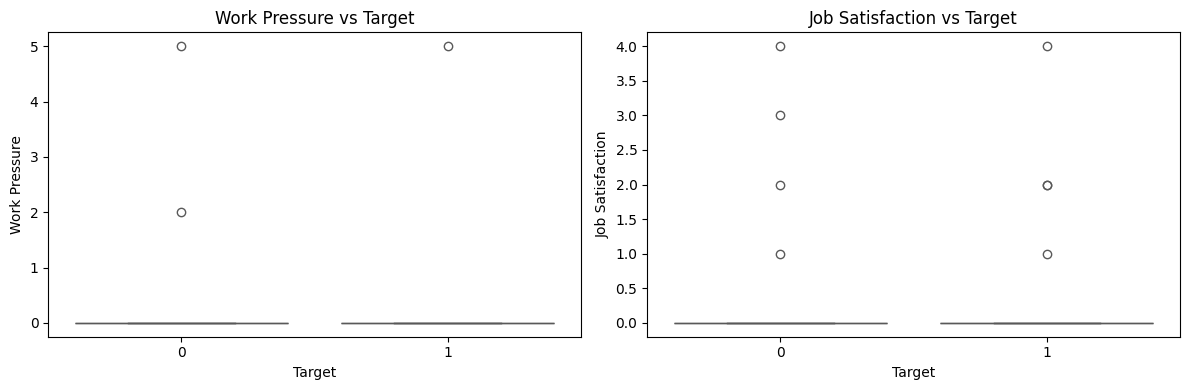

In [ ]:
# 1.7 - Visualize distributions of selected job-related columns
plt.figure(figsize=(12, 4))

for i, col in enumerate(colsJob, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Depression', y=col, palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xlabel('Target')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The few non-zero values are rare outliers, and they're randomly scattered — not concentrated in any one class.

> *🧠 This pattern strongly suggests these features offer no meaningful separation between the target classes.*


> 🔻 So we drop `Work Pressure` and `Job Satisfaction` : highly skewed, not predictive.

In [ ]:
# 📌 1.8 - Drop the columns in place
df.drop(['Work Pressure', 'Job Satisfaction'], axis=1, inplace=True)

In [43]:
# A quick look at the data frame after the changes
print_head(df)


First 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


> *🧠 Next we can focus on the `Profession` column.*

In [ ]:

# 1.9 - Analyze Profession value counts.
print(f"\n# Value counts for 'Profession':")
print(df['Profession'].value_counts(dropna=False))


# Value counts for 'Profession':
Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64


In [ ]:
# 1.10 - Summary of value counts for better readability
print(f"\n# Summery of value counts 'Profession':")

student_count = df[df['Profession'] == 'Student'].shape[0]
print(f"Student count: {student_count}")

non_student_count = df.shape[0] - student_count
print(f"Other count: {non_student_count} ({(non_student_count/df.shape[0])*100:.2f}%)")


# Summery of value counts 'Profession':
Student count: 27870
Other count: 31 (0.11%)


💡 **Observations:**  
- The column `Profession` is heavily imbalanced, with "Student" making up 99.89% of the data.
- The remaining values represent non-student professions and occur in very small numbers. 

> *🧠 Since our project focuses on students, and the presence of other professions is minimal and irrelevant, these entries can be safely excluded.*

> 🔻 So we drop `Profession` : not needed after filtering to only student data.

In [50]:
# 📌 1.11 - Drop the column in place
df.drop(['Profession'], axis=1, inplace=True)

In [51]:
# A quick look at the data frame after the changes
print_head(df)


First 5 rows:


,id,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
